In [1]:
COREGRAPH = 'dataset/bandwidth/263enc_spare.txt'

In [2]:
import numpy as np
data = np.loadtxt(COREGRAPH, dtype=int)
data

array([[    0,     1, 38001],
       [    0,     2,   193],
       [    0,     3, 24634],
       [    0,     5, 38016],
       [    0,     7,    25],
       [    1,     4, 38001],
       [    2,     3, 37958],
       [    2,     6, 46733],
       [    7,     8,  2083],
       [    8,    11,    10],
       [    9,    10,  4060],
       [   10,    11,   500],
       [   12,     1, 38001],
       [   12,     2,   193],
       [   12,     3, 24634],
       [   12,     5, 38016],
       [   12,     7,    25]])

In [3]:
from optimisers.nsga_ii import NSGA_II

nsga_ii = NSGA_II(n_tournaments=200)
nsga_ii.intialize_population(
    n_solutions=1000,
    n_cores=13,
    es_bit=30,
    el_bit=20,
    mesh_2d_shape=(4, 4),
    core_graph=data,
)

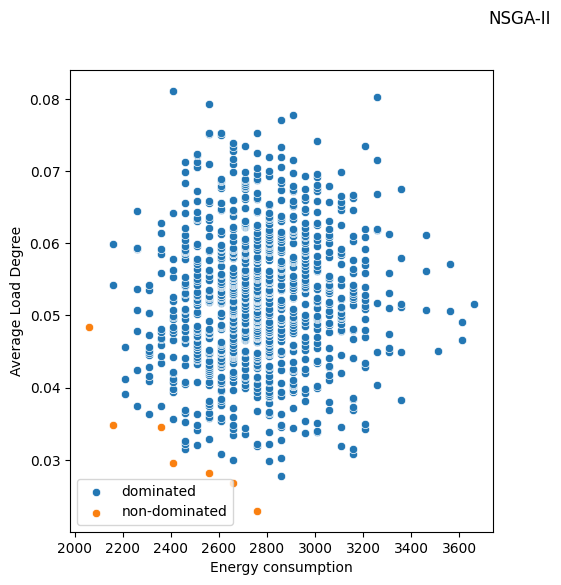

In [4]:
nsga_ii.non_dominated_sorting()
nsga_ii.visualize_objective_space('NSGA-II', figsize=(12, 6), labels=['Energy consumption', 'Average Load Degree'])

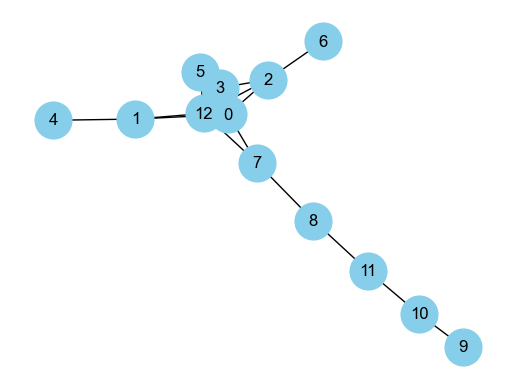

In [5]:
nsga_ii.population[0].visualize_core_graph()

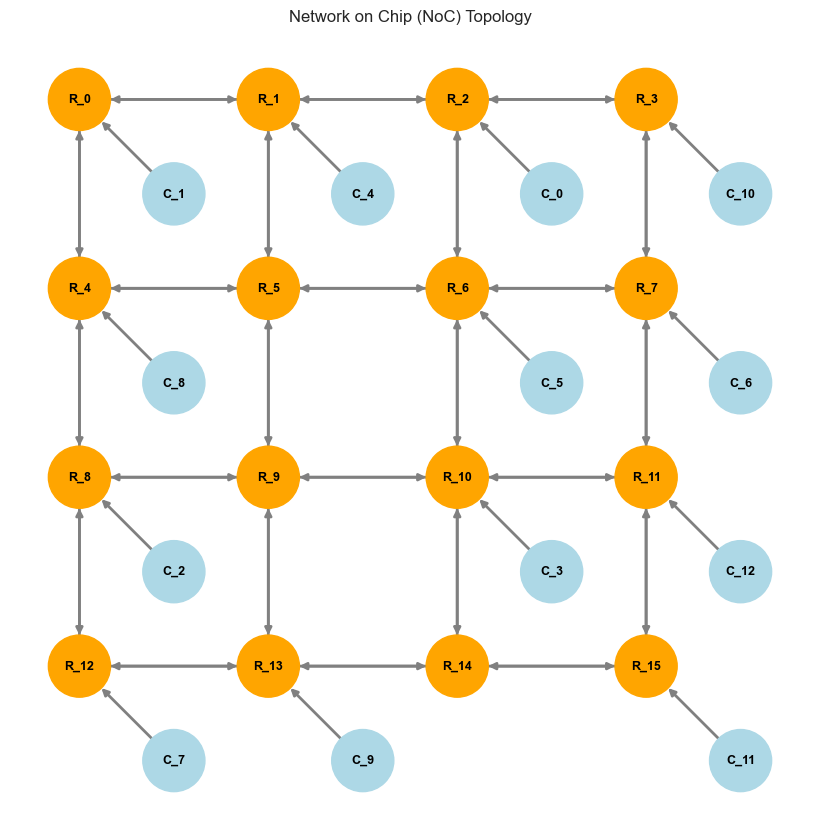

In [6]:
nsga_ii.population[0].visualize_NoC()

In [7]:
nsga_ii.optimize(n_evaluations=2)

/Users/dathd6/Developments/Network-on-Chips-Application-Mapping/optimisers/nsga_ii.py:27: RuntimeWarning: invalid value encountered in divide
  normalized_fitnesses[:, j] = (fitnesses[:, j] - min_val) / val_range


	Evaluation:  1
	Evaluation:  2


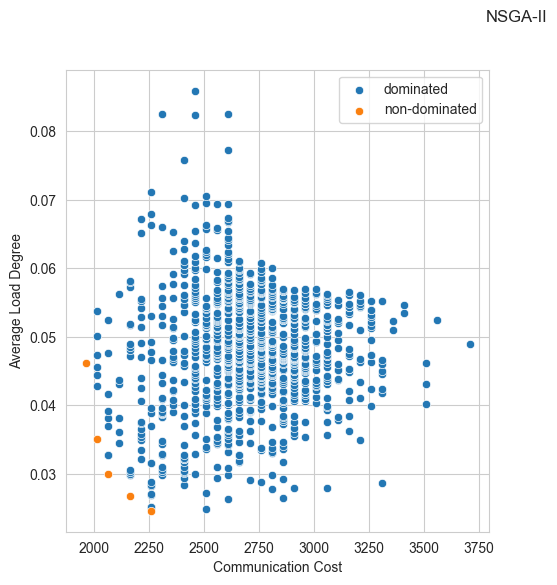

In [ ]:
nsga_ii.non_dominated_sorting()
nsga_ii.visualize_objective_space('NSGA-II', figsize=(12, 6), labels=['Communication Cost', 'Average Load Degree'])

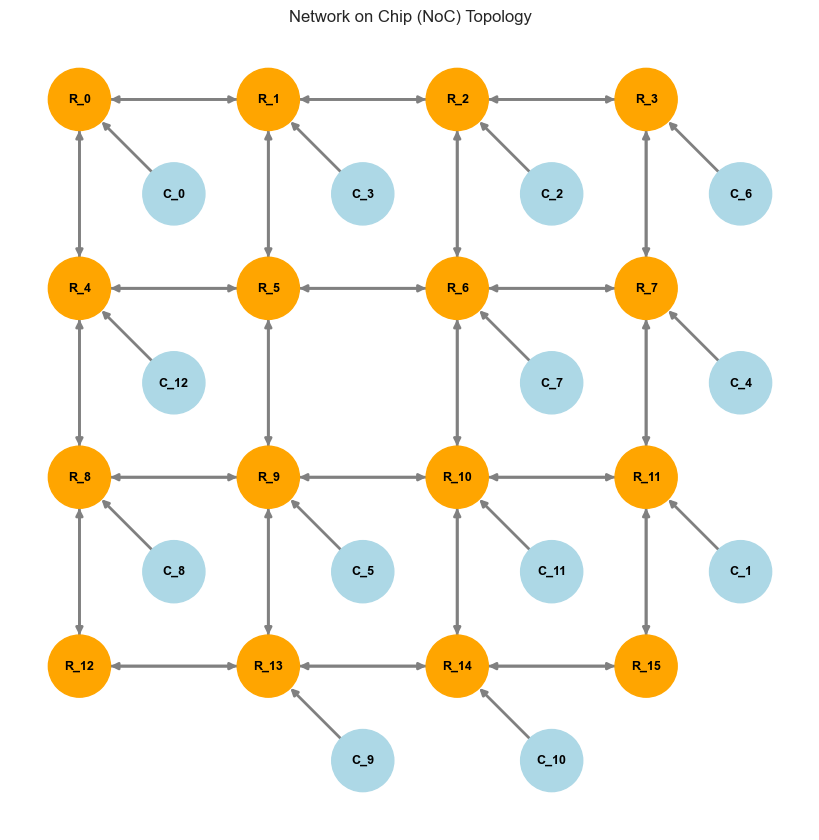

In [ ]:
nsga_ii.population[nsga_ii.pareto_fronts[0]][0].visualize_NoC()

In [ ]:
from optimisers.bilevel import Bilevel

bilevel = Bilevel(population=nsga_ii.population, n_tournaments=200)

In [ ]:
bilevel.optimize(n_evaluations=100)

TypeError: 'method' object is not subscriptable

In [ ]:
nsga_ii.non_dominated_sorting()
nsga_ii.visualize_objective_space('NSGA-II', figsize=(12, 6), labels=['Communication Cost', 'Average Load Degree'])

In [ ]:
nsga_ii.population[nsga_ii.pareto_fronts[0]][0].visualize_NoC()